# Task 1  Principal Component Analysis

In [1]:
from helpers.data import (
    get_trajectory_dataset,
    get_racoon_img,
)
from helpers.plots import (
    plot_principal_components,
    plot_image_reconstruction,
    plot_truncation_error,
    plot_pedestrian_trajectories,
    plot_projection_subspace,
    plot_trajectory_2D_subspace,
    plot_trajectory_3D_subspace,
)
from helpers.pca import (
    get_pca_reconstruction,
    get_truncation_error,
    get_explained_variance_ratio,
)
from sklearn.decomposition import PCA
import numpy as np



# Part 1 - PCA Dataset Analysis

To investigate the procedure of PCA in more detail the following section outlines basics of PCA transformation of different datasets using only SVD libraries. <br>
The initial dataset contains 100 points in two dimensional space. <br>
Using SVD on the dataset one can obtain the direction of the principle components. (Shown in the plot below by colored terse line) <br>
For illustration purposes the principle component vector is multiplied with a constant depending on the variance of each component.

Energy ratio using our SVD-based PCA implementation: 

Energy first component 0.9931426561434291
Energy second component 0.006857343856570892 



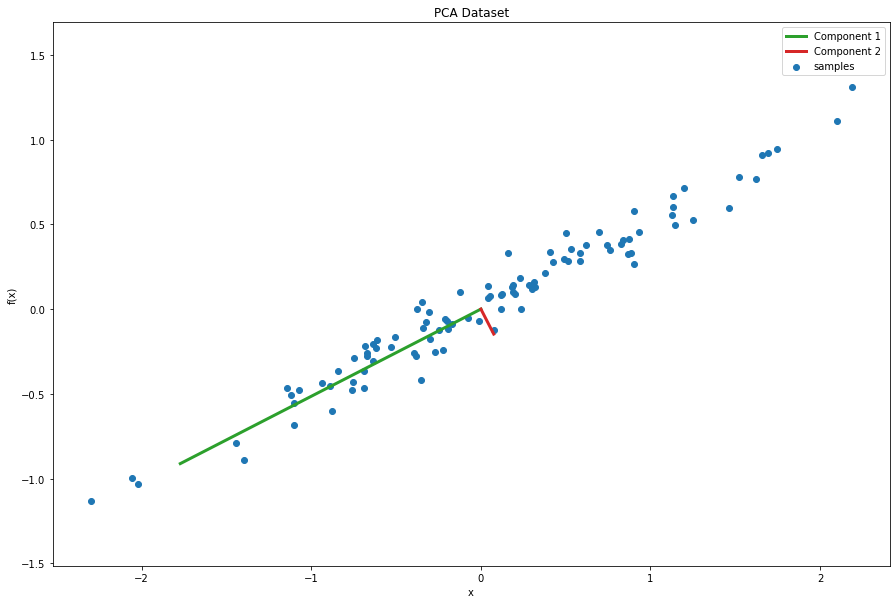

In [2]:
pca_dataset = get_trajectory_dataset("data/pca_dataset.txt")
pca_dataset_reconstructed, svd_matrices = get_pca_reconstruction(
    pca_dataset, get_full_reconstruction=True, n_principal_components=None
)
plot_principal_components(pca_dataset_reconstructed, svd_matrices, scale_components=True)

energy = get_explained_variance_ratio(svd_matrices[1])

print("Energy ratio using our SVD-based PCA implementation: \n")
print(f"Energy first component {energy[0]}")
print(f"Energy second component {energy[1]} \n")


In [3]:
# Verify Results:

pca = PCA(n_components=2)
pca.fit(pca_dataset)
print("Verification of the energy ratio using PCA from Sklearn: \n")
print(f"Energy first component {pca.explained_variance_ratio_[0]}")
print(f"Energy second component {pca.explained_variance_ratio_[1]}")


Verification of the energy ratio using PCA from Sklearn: 

Energy first component 0.993142656143429
Energy second component 0.00685734385657089


The aim of this procedure is to represent the data with the lowest possible dimension since this simplifies subsequent calculations. <br>
Further more for high dimensional dataset this is even a prerequisite to be visualized. <br>
Although this makes little sense in two dimensions, the principle approach should nevertheless be made clear. <br>
For this purpose, the linear subspace should be approximated in the direction of the largest principle component. <br>

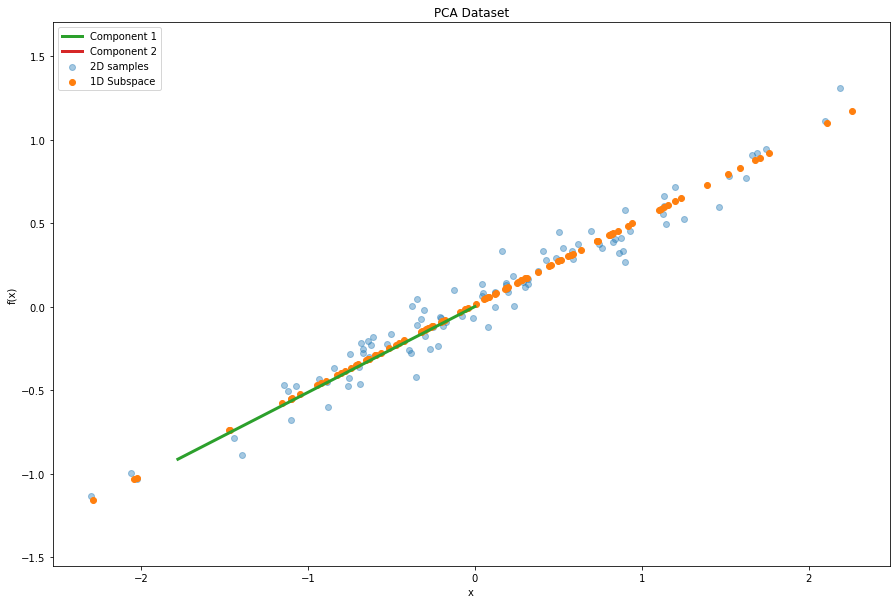

In [4]:
pca_dataset_reconstructed, svd_matrices = get_pca_reconstruction(
    pca_dataset, get_full_reconstruction=False, n_principal_components=1
)
plot_projection_subspace(pca_dataset, pca_dataset_reconstructed, svd_matrices, scale_components=True, transform=False)


In order to achieve the simplest representation of our data, PCA now also offers the possibility of a principal axis transformation into the coordinate system that is spanned by the two principle components. <br>
This procedure is possible for the whole dataset as well as for the one-dimensional subspace only. <br>
The transformation shown here results from: <br>

$\hat{X} = X \cdot V$ where $\hat{X}$ is the transformed dataset, $X$ the original dataset and $V$ the matrix containing the principle components as columns. 

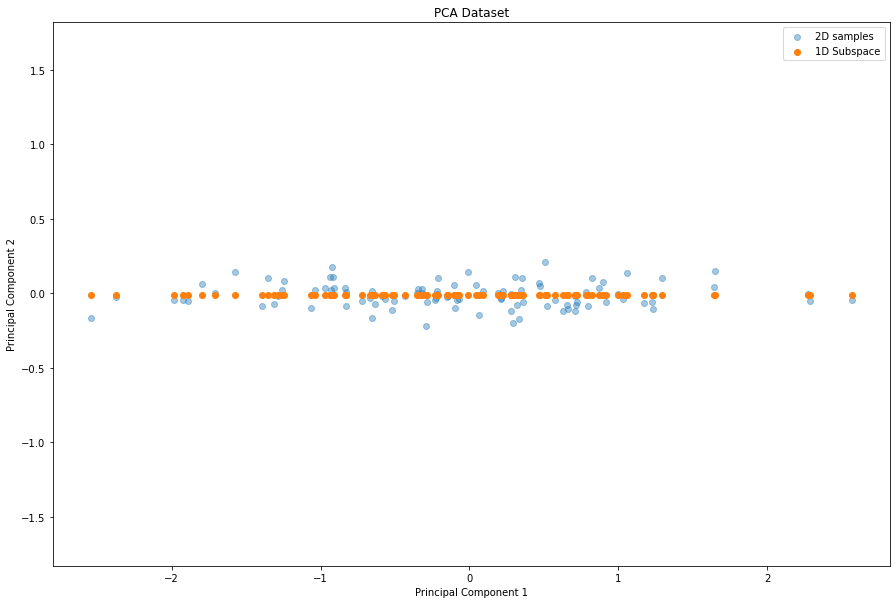

In [5]:
plot_projection_subspace(pca_dataset, pca_dataset_reconstructed, svd_matrices, scale_components=True, transform=True)


# Part 2 Image Dataset Analysis 

An example of high-dimensional data can be found in pictures. <br>
For this purpose, an example photo is to be converted into a grey image and scaled to the size of (249 x 185). <br>
The image is then to be reconstructed using the SVD-based PCA algorithm. 
For this pupose the section belows shows the reconstruction result of four different numbers of principle components.

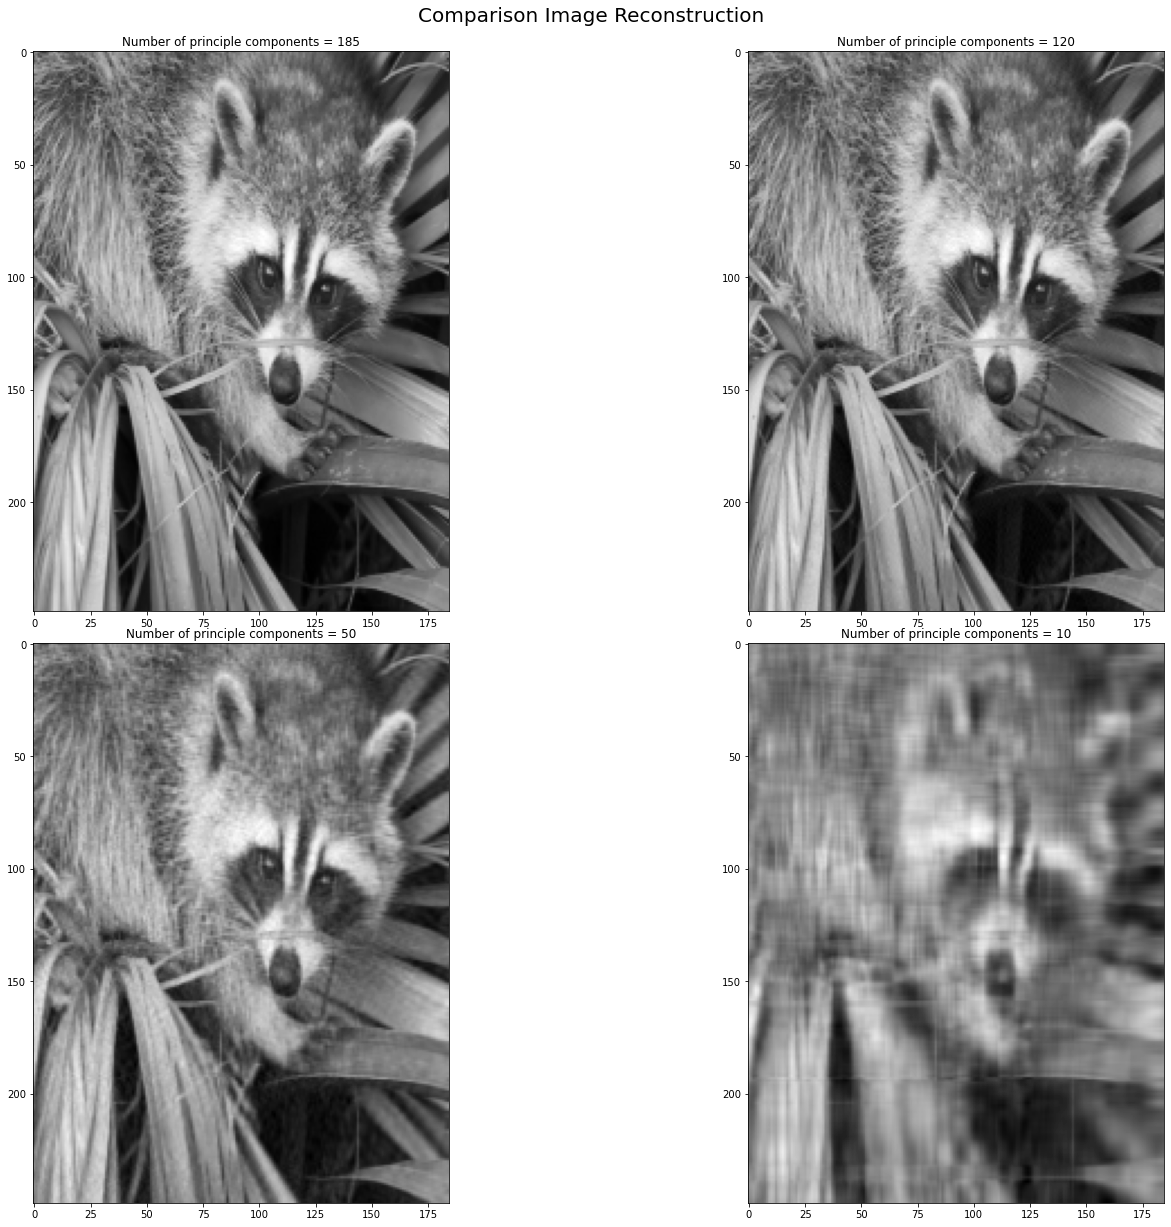

In [6]:
racoon_img = get_racoon_img()
n_principal_components = [185, 120, 50, 10]

racoon_img_reconstructed_n185, _ = get_pca_reconstruction(
    racoon_img, get_full_reconstruction=False, n_principal_components=n_principal_components[0]
)
racoon_img_reconstructed_n120, _ = get_pca_reconstruction(
    racoon_img, get_full_reconstruction=False, n_principal_components=n_principal_components[1]
)
racoon_img_reconstructed_n050, _ = get_pca_reconstruction(
    racoon_img, get_full_reconstruction=False, n_principal_components=n_principal_components[2]
)
racoon_img_reconstructed_n010, _ = get_pca_reconstruction(
    racoon_img, get_full_reconstruction=False, n_principal_components=n_principal_components[3]
)

plot_image_reconstruction(
    [
        racoon_img_reconstructed_n185,
        racoon_img_reconstructed_n120,
        racoon_img_reconstructed_n050,
        racoon_img_reconstructed_n010,
    ],
    n_principal_components,
)


If one look at the images, it becomes clear that even with a small number of prinziple components, the essence of the image can be reconstructed. <br>
This becomes clear when you look at the images with n=50 and n=185 principle components, since you notice here that one gain almost no additional image information through the triple amount of principle components. <br>
To show this even more clearly, you can look at the explained variance ("energy") for the respective component.

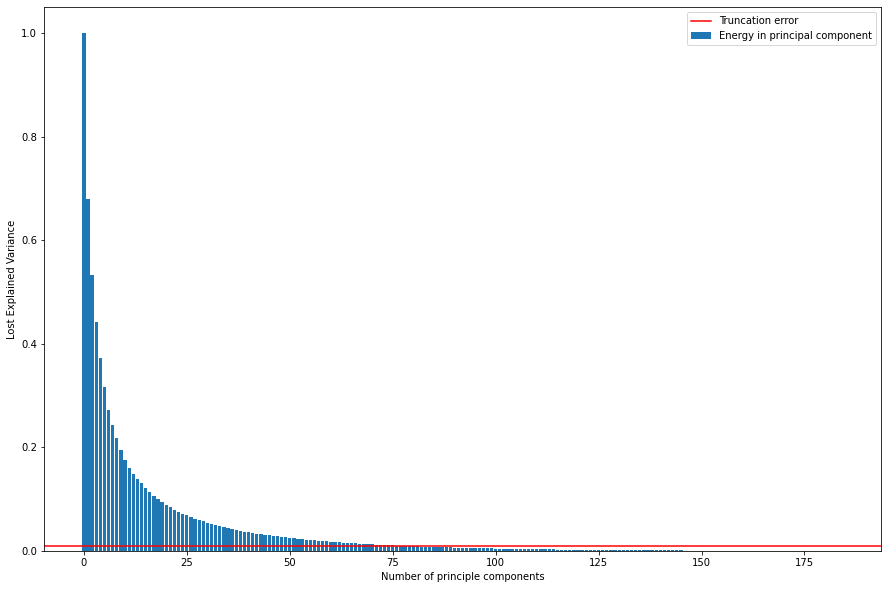

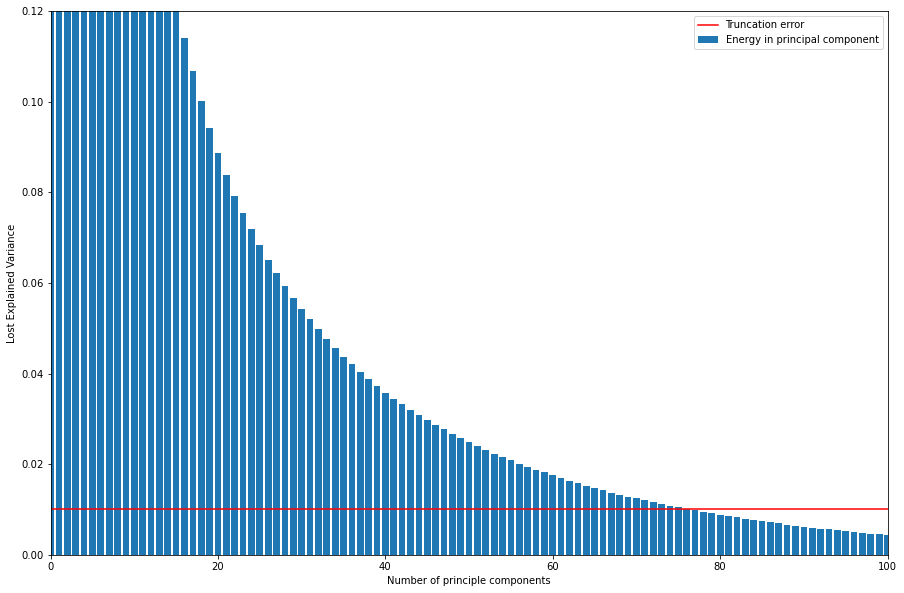

Lost energy is smaller than 1% since the 77th principal component


In [7]:
truncation_errors, threshold_pass_idx = get_truncation_error(0.01, racoon_img, 185)
plot_truncation_error(truncation_errors, 0.01, zoom=False)
plot_truncation_error(truncation_errors, 0.01, zoom=True)
print(f"Lost energy is smaller than 1% since the {threshold_pass_idx}th principal component")


# Part 3 PCA Trajectory

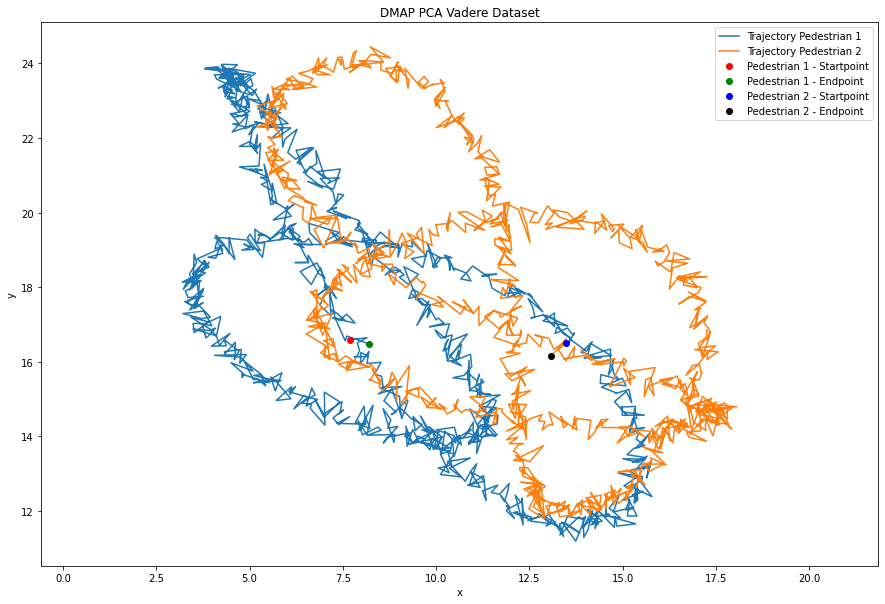

In [8]:
DMAP_PCA_vadere_dataset = get_trajectory_dataset("data/data_DMAP_PCA_vadere.txt")
plot_pedestrian_trajectories(DMAP_PCA_vadere_dataset)


Project dataset to first two principle components

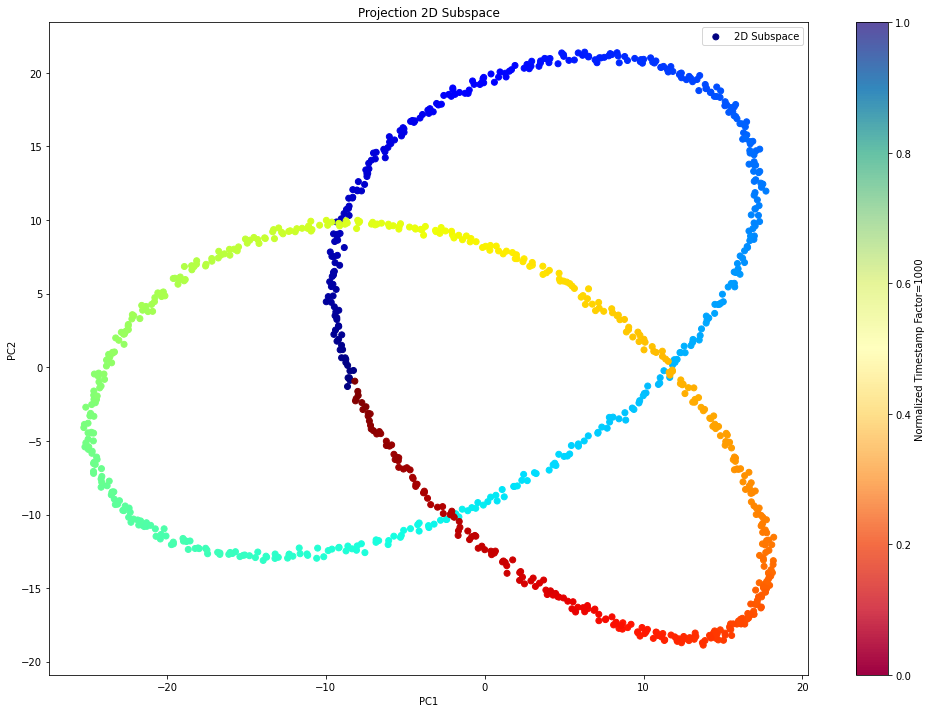

In [9]:
DMAP_reconstruction, svd_matrices = get_pca_reconstruction(DMAP_PCA_vadere_dataset, False, 2)
plot_trajectory_2D_subspace(svd_matrices)


In [10]:
DMAP_reconstruction, svd_matrices = get_pca_reconstruction(DMAP_PCA_vadere_dataset, True, None)
energy = get_explained_variance_ratio(svd_matrices[1])
print(f"Energy of first two principal components {energy[0] + energy[1]}")


Energy of first two principal components 0.8492464226063752


In [11]:
# Verify Results
pca = PCA(n_components=2)
pca.fit(DMAP_PCA_vadere_dataset)
print(f"Verification of the energy ratio using PCA from Sklearn: {np.sum(pca.explained_variance_ratio_)}")


Verification of the energy ratio using PCA from Sklearn: 0.8492464226063752


It can be seen that both energy values do match and indicate that using two components is not enough to capture most (>90%) of the energy. <br>
Using three principal components seem to achieve this. <br>
The resulting explained variance is shown below. 

In [12]:
print(f"Energy of first three principal components {energy[0]+energy[1]+energy[2]}")

# Verify Results
pca = PCA(n_components=3)
pca.fit(DMAP_PCA_vadere_dataset)
print(f"Verification of the energy ratio using PCA from Sklearn: {np.sum(pca.explained_variance_ratio_)}")


Energy of first three principal components 0.9971310341299298
Verification of the energy ratio using PCA from Sklearn: 0.9971310341299293


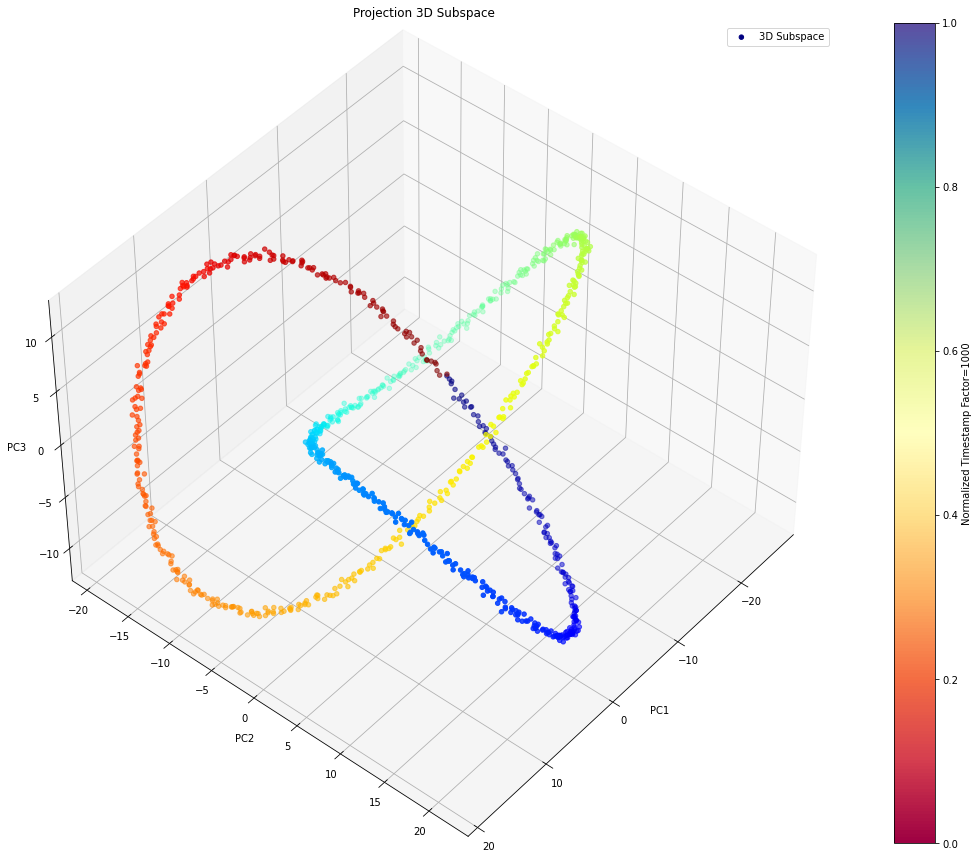

In [13]:
DMAP_reconstruction, svd_matrices = get_pca_reconstruction(DMAP_PCA_vadere_dataset, False, 3)
plot_trajectory_3D_subspace(svd_matrices)
